<a href="https://colab.research.google.com/github/EdivaldoSantos/Reconhecimento_do_uso_de_mascara/blob/main/IdentificacaoMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


####**Identificação:** José Edivaldo Silva dos Santos (2578249)

**Identificação do uso de máscara**

Com a chegada do vírus covid-19, a sociedade mundial precisou se adaptar a uma nova cultura do uso do álcool em gel, manter um distanciamento social e a utilização da máscara de proteção. O número de mortes causadas por esse vírus é altíssimo em todo o mundo e de pessoas que contraíram o vírus chegando a ficarem à beira da morte. Muitas empresas tiveram que fechar as portas esperando a pandemia passar, outros descobriram a cultura do home office visando a segurança de seus colaboradores e a continuidade do negócio.

Empresas da área de saúde como clínicas, hospitais e distribuidoras de medicamentos, por exemplo, tiveram maior dificuldade em aplicar a utilização do home office para algumas funções tais como médico, enfermeiros e  técnicos em enfermagem.

A utilização de máscaras funciona como uma barreira física para liberação de gotículas no ar  quando a tosse, espirros e até mesmo durante conversas por onde o vírus é transmitido. Apesar de sua eficácia, seu uso deve ser acompanhado de outras medidas de proteção, como limpeza frequente das mãos e distanciamento físico de 2 metros de outras pessoas.

**Objetivo**

Esse projeto tem como objetivo aplicar algoritmos de machine learning para identificação do uso de máscara.

**Especificação Técnica**

O dataset de imagens utilizado para o desenvolvimento desse projeto foi localizado no portal https://iaexpert.academy/, importado para meu Doogle Drive para facilitar a integração com o Google Colab

O formato dos dados utilizados neste dataset são imagens “JPG” separados por 2 categorias que são: 
-  **Cmask** (Imagens de pessoas com máscara).
- **Smask** (Trata-se de pessoas sem a utilização da máscara).

Esses dois diretórios formam o conjunto de dados utilizados para treinamento do algoritmo.

Neste projeto iremos trabalhar com o modelo *supervisionado*. Usaremos o algoritmo classificador para induzir um modelo preditivo por meio da observação de um conjunto de objetos rotulados, que é referenciado como conjunto de dados para treinamento, esses rótulos correspondem a classe ou valores previamente definidos com  "*Com máscara*" ou "*Sem máscara*”, com a finalidade de classificar, posteriormente, um objeto cujo rótulo seja desconhecido.

O algoritmo KNN é um dos algoritmos de classificação mais utilizados para modelos supervisionados, sua ideia, consiste em dado um objeto desconhecido, o KNN procurar pelo K vizinho mais próximo a ele, em um conjunto de dados. Em nosso contexto, se esse objeto desconhecido estiver mais próximo do conjunto de dados: "*Com máscara*" ou "*Sem máscara*” e assim nos retornará dizendo qual seria seu rótulo.

Para o desenvolvimento desse projeto o Google Colab, Google Drive  o Python 3.7.11 e as biblioteca:

- **K-nearest neighbor** - KNN é um algoritmo de aprendizado de máquina supervisionado simples e fácil de implementar que pode ser usado para resolver problemas de classificação e regressão.

- **OpenCV** - É uma biblioteca que possui funções de manipulações básicas de imagens e vídeos, desde o carregamento de arquivos, até a conversão de um formato em outro. 

- **Numpy** - É uma biblioteca com funções para se trabalhar com computação numérica. Seu principal objeto é o vetor n-dimensional, ou ndarray.

- **Pandas** - Uma biblioteca que oferece estruturas e operações para manipular tabelas numéricas e séries temporais; uma ferramenta de processamento de dados de alto desempenho; com recursos flexíveis de manipulação de planilhas e de banco de dados relacionais.

- **Matplotlib** - Essa biblioteca é utilizada para criação de gráficos e visualização de dados.

- **Scikit-learn** - É uma biblioteca de aprendizado de máquina,  nela encontramos  vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte.









In [ ]:
# Carregar as bibliotecas necessárias: 
import cv2 as cv 
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix #matriz de confusão 
from sklearn.metrics import classification_report # metricas de validação
from sklearn.metrics import accuracy_score #acuracia
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import f1_score #f1-score
from sklearn.metrics import roc_auc_score #area sob curva roc
from sklearn.metrics import roc_curve #curva roc
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")


Após a importação das bibliotecas, iremos criar um dataframe, contendo o caminho da imagens (CAMINHO), a descrição (Com mascara ou Sem mascara) e o tipo (0 ou 1) 

In [ ]:
# Carregar a base de dados
# Criação do dataframe função "dados"
def carrega_dataframe(): 
  dados = {
    "CAMINHO": [],
    "DESCRICAO": [],
    "TIPO": [],
  }
 
 # Caminho do repositório do dataset que iremos trabalhar, está em meu google drive.
  caminho_cmask = "/content/drive/MyDrive/projeto/cmask"
  caminho_smask = "/content/drive/MyDrive/projeto/smask"
 
 # criação das lista de recepera o caminho das imagems e os rótulos.
  cmask = os.listdir(caminho_cmask)
  smask = os.listdir(caminho_smask)
 
 # Aqui vamos percorrer o caminho das imagens e armazená las como também adicionar a descrição e o tipo.
  for arquivo in cmask:
    dados["CAMINHO"].append(f"{caminho_cmask}{os.sep}{arquivo}")
    dados["DESCRICAO"].append(f"Com mascara")
    dados["TIPO"].append(1)
 
  for arquivo in smask:
    dados["CAMINHO"].append(f"{caminho_smask}{os.sep}{arquivo}")
    dados["DESCRICAO"].append(f"Sem mascara")
    dados["TIPO"].append(0)
 
  dataframe = pd.DataFrame(dados)
 
  return dataframe

In [ ]:
# Aqui pegamos a função que criamos acima "carrega_dataframe" e carregamos em uma variável dados, assim poderemos facilitar o uso. 
dados = carrega_dataframe()

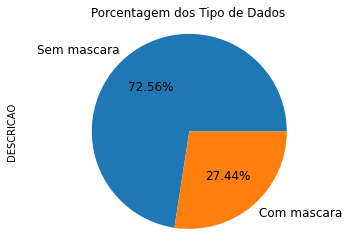

In [ ]:
# Grafico do dataset
dados["DESCRICAO"].value_counts().plot.pie(title="Porcentagem dos Tipo de Dados", autopct='%.2f%%', legend = False, fontsize=12) 
plt.axis('equal')

plt.show()

In [ ]:
# Neste passo iremos salvar nosso dataframe, em um arquivo csv para auxiliar todas as vezes que precisarmos utilizar esse dataframe.
# Salvaremos no mesmo diretor das imagens no Google Drive.
dados.to_csv("/content/drive/MyDrive/projeto/imagens-df.csv")

In [ ]:
# Como este comando podemos ler nosso arquivo csv criado no passo anterior
dados = pd.read_csv("/content/drive/MyDrive/projeto/imagens-df.csv")

In [ ]:
# Exibindo o dataframe
dados.head(500)

,Unnamed: 0,CAMINHO,DESCRICAO,TIPO
0,0,/content/drive/MyDrive/projeto/cmask/37.jpg,Com mascara,1
1,1,/content/drive/MyDrive/projeto/cmask/187.jpg,Com mascara,1
2,2,/content/drive/MyDrive/projeto/cmask/182.jpg,Com mascara,1
3,3,/content/drive/MyDrive/projeto/cmask/30.jpg,Com mascara,1
4,4,/content/drive/MyDrive/projeto/cmask/217.jpg,Com mascara,1
...,...,...,...,...
495,495,/content/drive/MyDrive/projeto/smask/333.jpg,Sem mascara,0
496,496,/content/drive/MyDrive/projeto/smask/386.jpg,Sem mascara,0
497,497,/content/drive/MyDrive/projeto/smask/163.jpg,Sem mascara,0
498,498,/content/drive/MyDrive/projeto/smask/234.jpg,Sem mascara,0


Pré-processamento


In [ ]:
# Esta etapa vamos criar uma função para converter as imagens em escala de cinza utilizando a biblioteca OpenCV e transformaremos essa imagens em um vetor utilizando método “.flatten”   e adicionando esse dados ao nosso dataframe, na coluna “IMAGEM”

def ler_imagens(dados):
  arquivos = dados["CAMINHO"]
  imagens = list()
 
  for arquivo in arquivos:
    img = cv.cvtColor(cv.imread(arquivo), cv.COLOR_BGR2GRAY).flatten()
    imagens.append(img)
    
  dados["IMAGEM"] = imagens

In [ ]:
# Executaremos a função ler_imagens, para as imagens de nosso dataframe

ler_imagens(dados)

In [ ]:
# Verificando nova estrutura de nosso dataframe

dados.head(500)

,Unnamed: 0,CAMINHO,DESCRICAO,TIPO,IMAGEM
0,0,/content/drive/MyDrive/projeto/cmask/37.jpg,Com mascara,1,"[43, 40, 39, 41, 44, 49, 62, 76, 79, 71, 62, 5..."
1,1,/content/drive/MyDrive/projeto/cmask/187.jpg,Com mascara,1,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 38, 38, 3..."
2,2,/content/drive/MyDrive/projeto/cmask/182.jpg,Com mascara,1,"[1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 1, ..."
3,3,/content/drive/MyDrive/projeto/cmask/30.jpg,Com mascara,1,"[138, 144, 184, 179, 184, 171, 163, 168, 165, ..."
4,4,/content/drive/MyDrive/projeto/cmask/217.jpg,Com mascara,1,"[102, 110, 99, 105, 136, 142, 131, 139, 138, 1..."
...,...,...,...,...,...
495,495,/content/drive/MyDrive/projeto/smask/333.jpg,Sem mascara,0,"[89, 89, 88, 86, 84, 82, 80, 79, 79, 77, 75, 7..."
496,496,/content/drive/MyDrive/projeto/smask/386.jpg,Sem mascara,0,"[49, 49, 50, 49, 49, 48, 47, 47, 46, 45, 45, 4..."
497,497,/content/drive/MyDrive/projeto/smask/163.jpg,Sem mascara,0,"[164, 165, 168, 174, 179, 179, 177, 175, 163, ..."
498,498,/content/drive/MyDrive/projeto/smask/234.jpg,Sem mascara,0,"[151, 148, 153, 119, 131, 108, 129, 137, 129, ..."


In [ ]:
# Agora que nosso dataframe está completo, vamos dividir dois conjuntos "treinamento" e "teste". Para isso utilizaremos o método train_test_split da biblioteca Scikit-learn.
# Na variável "X" carregamos as imagens no formato de lista. Já na variável "Y" campo tipo também como um lista

X = list(dados["IMAGEM"]) # Característica
y = list(dados["TIPO"]) # Classe

In [ ]:
# Esta etapa vamos dividir nossa lista em train e test, utilizando train_test_split e passando as lista (X e Y) utilizando 0.99 de nosso conjunto de dados já que temos mais imagens de pessoas sem máscara
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.99, random_state=13)

Aqui vamos utilizar da Analise de Componemntes Pricipais(PCA, como é conhecido).
PCA é um metodo que tem por finalidade analisar um conjunto de dados e escolher as formas mais representativas oara tal analise.
o PCA ira extrair das imagens aoenas as caractesiticas mais notaveis para classificacao

In [ ]:
# Agora que temos separado treino e teste nosso conjunto de dados, refinamos as características da imagem.
# Dessa forma podemos filtrar as principais características que são mais importantes para classificar um rosto em uma imagem.

pca = PCA(n_components=30)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Aqui vamos utilizar o PCA para melhora nossa análise, utilizando o método transform os modelos de X_train e X_test

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

Agora que temos as principais característica de nossa imagem graças a ajuda do PCA, podemos iniciar o treinamento do KNN. Abaixo criaremos um função para passar alguns parametros com o K elementos do KNN a qual vamos basear.


In [ ]:
parametros = {
    "n_neighbors": [2, 3, 5, 11, 19, 23, 29], # Lista de valores K
    "weights": ["uniform", "distance"], # Lista para peso
    "metric": ["euclidean", "manhattam", "cosine", "l1", "l2"] # Lista de metricas
}

O GridSearchCV é uma ferramenta usada para automatizar o processo de ajuste dos parâmetros de um algoritmo, pois ele fará de maneira sistemática diversas combinações dos parâmetros e depois de avaliá-los os armazenará num único objeto.

O objetivo primário do GridSearchCV é a criação de combinações de parâmetros para posteriormente avaliá-las.

In [ ]:
# Vamos criar uma instancia de GridSearch, passando um modelo vazio do KNN e passando a função parâmetro criada acima.
# Com isso o algoritmo irá avaliar qual o melhor hiperparâmetro para ser utilizado no treinamento
knn = GridSearchCV(KNeighborsClassifier(), parametros) 

In [ ]:
# Agora com o modelo instanciado iremos passar X_train que é o conjunto de característica de treino, Y_train que é conjunto de classe de treino
# Depois de executar essa célula temos nosso modelo treinado
knn.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattam', 'cosine', 'l1',
                                    'l2'],
                         'n_neighbors': [2, 3, 5, 11, 19, 23, 29],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn.score(X=X_test, y=y_test)

0.9

In [ ]:
predicao = knn.predict(X_test)


In [ ]:
# Agora vamos criar um matrix de confusão separando em verdadeiros_positivos, falsos_positivos, falsos_negativos, verdadeiros_negativos
verdadeiros_positivos, falsos_positivos, falsos_negativos, verdadeiros_negativos = confusion_matrix(y_test, predicao).ravel()

In [ ]:
verdadeiros_positivos, verdadeiros_negativos  # O primeiro valor corresponde a coluna verdadeiros_positivos e o segundo a coluna verdadeiros_negativos

(8, 1)

In [ ]:
falsos_positivos, falsos_negativos # O primeiro valor corresponde a coluna falsos_positivos e o segundo a coluna falsos_negativos

(1, 0)

In [ ]:
# Acurácia
acuracia = accuracy_score(y_test, predicao)
print('Acurácia: %f' % acuracia)

Acurácia: 0.900000


In [ ]:
# Precision
precision = precision_score(y_test, predicao)
print('Precision: %f' % precision)

Precision: 0.500000


In [ ]:
# Recall
recall = recall_score(y_test, predicao)
print('Recall: %f' % recall)

Recall: 1.000000


In [ ]:
# F1-Score
f1 = f1_score(y_test, predicao)
print('F1-Score: %f' % f1)

F1-Score: 0.666667


In [ ]:
# calculate AUC
auc = roc_auc_score(y_test, predicao)
print('AUC: %.3f' % auc)

AUC: 0.944


In [ ]:
print(classification_report(y_test, predicao))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.50      1.00      0.67         1

    accuracy                           0.90        10
   macro avg       0.75      0.94      0.80        10
weighted avg       0.95      0.90      0.91        10



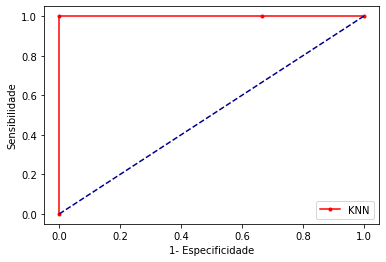

AUC-ROC : 0.9444444444444444


In [ ]:
# Estimando as probabilidades
knn_prob = knn.predict_proba(X_test)
probs = knn_prob[:, 1]
rfp, rvp,lim = roc_curve(y_test, probs)

# Gráfico da curva roc
plt.plot(rfp, rvp, marker='.', label='KNN',color="red")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

# axis labels
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# show the legend
plt.legend()
# show the plot
plt.show()
print("AUC-ROC :",auc)